# **Oficina 4: identificando grupos a partir de fotos**
- Base de dados: [Agrupamento de faces Kaggle](https://www.kaggle.com/datasets/preprocessiing/face-clustering)

In [1]:
# Importações
import os

from glob import glob
from random import sample
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import shutil
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

## Preparando as Imagens

In [2]:
# Diretório de imagens
image_dir = './data/UTKFace'

# Listando imagens
images_path = glob(os.path.join(image_dir, '*.jpg'))

# Limitando o número de imagens
images_path = sample(images_path, 1000)

print(f'Número de imagens: {len(images_path)}')

Número de imagens: 1000


## Extraindo as Característica com um modelo pré-treinado

In [3]:
# Carregando modelo pré-treinado
base_model = MobileNetV2(include_top=False, weights='imagenet', pooling='avg')

# Função para extrair características
def extract_features(image_path):
    image = load_img(image_path, target_size=(224, 224))
    img_array  = img_to_array(image)
    img_array  = preprocess_input(img_array )
    img_array  = np.expand_dims(img_array , axis=0)
    features = base_model.predict(img_array )
    return features.flatten()

# Extraindo características
image_features = np.array([extract_features(img_path) for img_path in images_path])
print(f'Número de características extraídas: {image_features.shape[1]}')

C:\Users\joaoi\AppData\Local\Temp\ipykernel_15736\148941845.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(include_top=False, weights='imagenet', pooling='avg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━

## Agrupando características com KMeans

In [4]:
# Número de clusters
n_clusters = 5

# aplicando KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(image_features)

# exibindo os clusters de cada imagem
for idx, cluster in enumerate(clusters):
    print(f'Imagem {images_path[idx]} pertence ao cluster {cluster}')

c:\Labs\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Labs\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^

Imagem ./data/UTKFace\7_1_1_20170116225209209.jpg.chip.jpg pertence ao cluster 3
Imagem ./data/UTKFace\36_0_0_20170104181434717.jpg.chip.jpg pertence ao cluster 4
Imagem ./data/UTKFace\19_1_2_20170104021632526.jpg.chip.jpg pertence ao cluster 1
Imagem ./data/UTKFace\56_0_0_20170109012058588.jpg.chip.jpg pertence ao cluster 4
Imagem ./data/UTKFace\7_0_1_20170110223522905.jpg.chip.jpg pertence ao cluster 0
Imagem ./data/UTKFace\21_0_0_20170102233225196.jpg.chip.jpg pertence ao cluster 0
Imagem ./data/UTKFace\58_0_0_20170105173628294.jpg.chip.jpg pertence ao cluster 4
Imagem ./data/UTKFace\30_0_0_20170104000150443.jpg.chip.jpg pertence ao cluster 0
Imagem ./data/UTKFace\36_1_0_20170117091609131.jpg.chip.jpg pertence ao cluster 1
Imagem ./data/UTKFace\26_1_0_20170116224857470.jpg.chip.jpg pertence ao cluster 1
Imagem ./data/UTKFace\45_0_0_20170104000913421.jpg.chip.jpg pertence ao cluster 0
Imagem ./data/UTKFace\26_0_2_20170116183713007.jpg.chip.jpg pertence ao cluster 1
Imagem ./data/UTKF

#

## Visualizando os Resultados


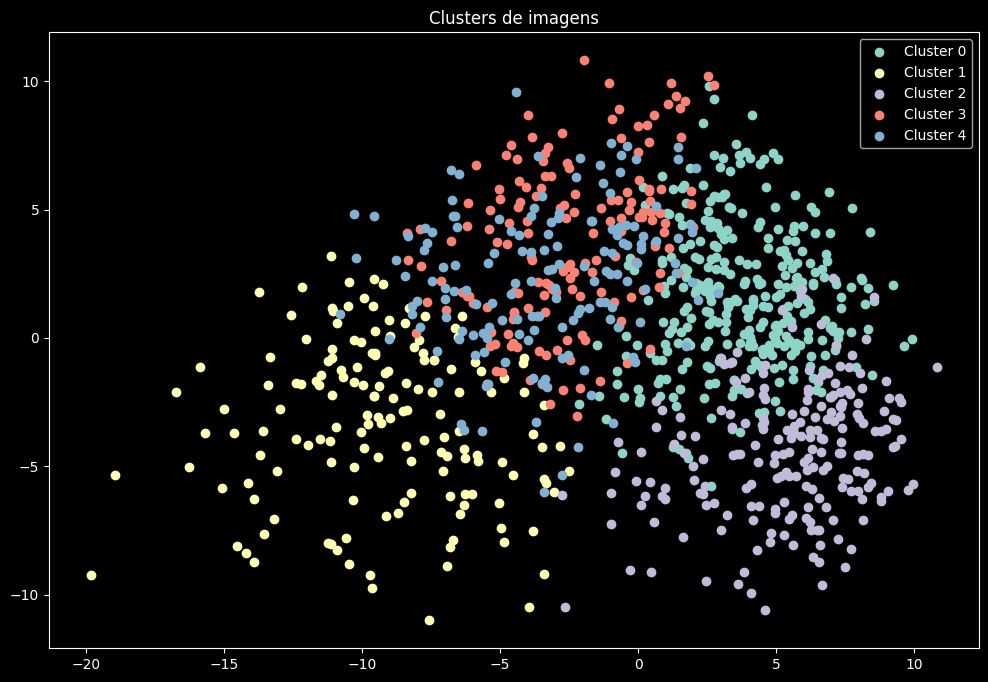

In [5]:
# Reduzindo a dimensionalidade com PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(image_features)

# Plotando os clusters
plt.figure(figsize=(12, 8))
for cluster_id in range(n_clusters):
    cluster_points = reduced_features[clusters == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}')
plt.title('Clusters de imagens')
plt.legend()
plt.show()

## Organizando as imagens por Cluster


In [6]:
# Criando diretórios para os clusters
output_dir = './data/clusters'
os.makedirs(output_dir, exist_ok=True)

for cluster_id in range(n_clusters):
    cluster_dir = os.path.join(output_dir, f'cluster_{cluster_id}')
    os.makedirs(cluster_dir, exist_ok=True)


# Movendo imagens para os diretórios dos clusters
for idx, cluster in enumerate(clusters):
    dest_path = os.path.join(output_dir, f'cluster_{cluster}', os.path.basename(images_path[idx]))
    shutil.copy(images_path[idx], dest_path)